<a href="https://colab.research.google.com/github/ProgramasParaFisicaDeParticulas/lecturadedatosabiertoscmszmumu-Kareem2602/blob/main/CMSOpenDataZtoMuMu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [51]:
#panda nos permite manipular el archivo csv https://pandas.pydata.org
import pandas as pd
#numpy nos permite hacer operaciones usando vectores https://numpy.org
import numpy as np
#plotly nos permite crear graficas interactivas https://plotly.com/python/
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from scipy.optimize import curve_fit
from scipy.special import wofz
from scipy.special import voigt_profile
%matplotlib inline
#usamos la liga que está directamente en la página.
particles = pd.read_csv('https://opendata.cern.ch/record/5208/files/Zmumu.csv',delimiter=',')
particles.head()


,Run,Event,pt1,eta1,phi1,Q1,dxy1,iso1,pt2,eta2,phi2,Q2,dxy2,iso2
0,165617,74969122,54.7055,-0.4324,2.5742,1,-0.0745,0.4999,34.2464,-0.9885,-0.4987,-1,0.0712,3.4221
1,165617,75138253,24.5872,-2.0522,2.8666,-1,-0.0554,0.0000,28.5389,0.3852,-1.9912,1,0.0515,0.0000
2,165617,75887636,31.7386,-2.2595,-1.3323,-1,0.0879,0.0000,30.2344,-0.4684,1.8833,1,-0.0876,0.0000
3,165617,75779415,39.7394,-0.7123,-0.3123,1,0.0585,0.0000,48.2790,-0.1956,2.9703,-1,-0.0492,0.0000
4,165617,75098104,41.2998,-0.1571,-3.0408,1,-0.0305,1.2280,43.4508,0.5910,-0.0428,-1,0.0442,0.0000


In [ ]:
fig_5=px.histogram(particles['pt2'],particles['pt2'])
fig_5.show()

In [ ]:
fig_5=px.histogram(particles['pt1'],particles['pt1'])
fig_5.show()

Q_product
-1    9664
 1     336
Name: count, dtype: int64


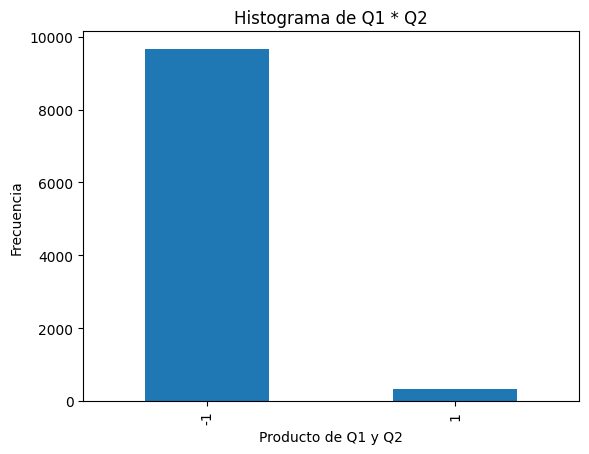

In [13]:
#Filtro de conservación de la carga:
df=particles = pd.read_csv('https://opendata.cern.ch/record/5208/files/Zmumu.csv',delimiter=',')
df['Q_product'] = df['Q1'] * df['Q2']

# Filtrar los que tengan producto -1
df_minus1 = df[df['Q_product'] == -1]

# Contar cuántos hay de cada uno (-1 y 1)
counts = df['Q_product'].value_counts().sort_index()

print(counts)

# Graficar histograma
counts.plot(kind='bar')
plt.xlabel('Producto de Q1 y Q2')
plt.ylabel('Frecuencia')
plt.title('Histograma de Q1 * Q2')
plt.show()

In [81]:
df = df_minus1
#filtro iso
df_filtered = df[(df['iso1'] < 0.15) & (df['iso2'] < 0.15)]
df_filtered.count()


,0
Run,4832
Event,4832
pt1,4832
eta1,4832
phi1,4832
Q1,4832
dxy1,4832
iso1,4832
pt2,4832
eta2,4832


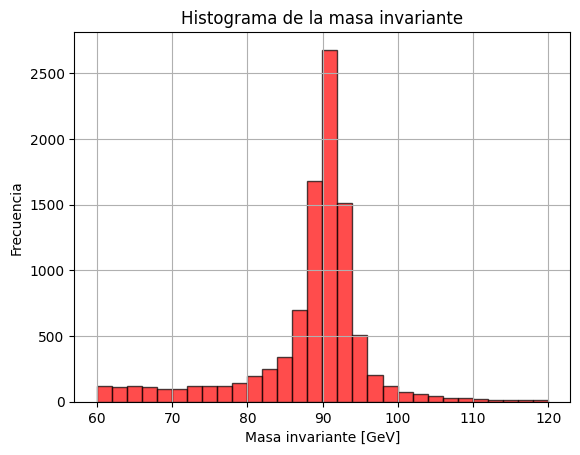

In [88]:
#Vamos a reconstruir la masa invariante utilizando los datos disponibles:
#p_x=pt*cos(phi), p_y=ptsin(phi), p_z=ptsinh(eta)
#Para obetner la energia utilizamos:
#E=ptcosh(eta)
#Momento p1:
df_px1=df['pt1']*np.cos(df['phi1'])
df_py1=df['pt1']*np.sin(df['phi1'])
df_pz1=df['pt1']*np.sinh(df['eta1'])
df_E1=df['pt1']*np.cosh(df['eta1'])
#Momento p2:
df_px2=df['pt2']*np.cos(df['phi2'])
df_py2=df['pt2']*np.sin(df['phi2'])
df_pz2=df['pt2']*np.sinh(df['eta2'])
df_E2=df['pt2']*np.cosh(df['eta2'])
#Entonces para la masa invariante:
#M=((E1+E2)^2-|p1+p2|^2)^(1/2)
df_M=((df_E1+df_E2)**2-((df_px1+df_px2)**2+(df_py1+df_py2)**2+(df_pz1+df_pz2)**2))**(1/2)
df['M_Invariant']=df_M

#Aqui ya tenemos nuestra masa invariante
Masa_Invariante=df['M_Invariant'].astype(float)
#Realizamos el histograma
df['M_Invariant'].plot.hist(bins=30, alpha=0.7, edgecolor='black', color= "red")

plt.xlabel('Masa invariante [GeV]')
plt.ylabel('Frecuencia')
plt.title('Histograma de la masa invariante')
plt.grid(True)
plt.show()

In [ ]:
#Del histogrograma anterior podemos saber el numero de eventos que estan en una masa aceptable para el bosonZ o sea 91.182+_0.0085
M_Z1=Masa_Invariante[Masa_Invariante>=91.1749]
MZ=M_Z1[M_Z1<=91.1935]

len(MZ)


31

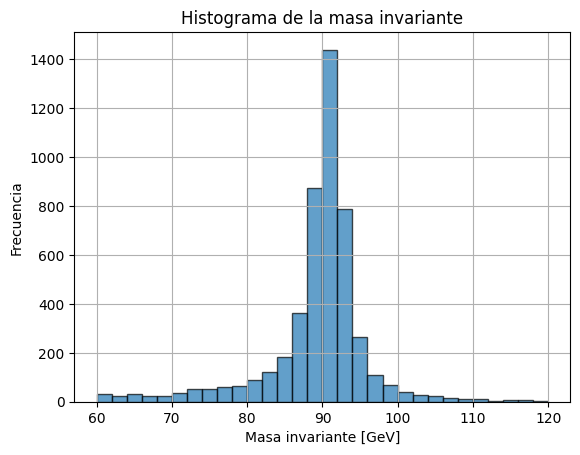

,M_if
0,NaN
1,88.812177
2,88.474683
3,90.332429
4,NaN


In [46]:
#Haremos el calculo de la masa invariante con los datos filtrados y la formula del articulo para contrastar:
#df_filtered.info()
delta_eta = df_filtered['eta1'] - df_filtered['eta2']

# Calcula la diferencia de phi
delta_phi = df_filtered['phi1'] - df_filtered['phi2']

# Masa invariante
df['M_if'] = np.sqrt(2 * df_filtered['pt1'] * df_filtered['pt2'] * (np.cosh(delta_eta) - np.cos(delta_phi)))

df['M_if'].plot.hist(bins=30, alpha=0.7, edgecolor='black')

plt.xlabel('Masa invariante [GeV]')
plt.ylabel('Frecuencia')
plt.title('Histograma de la masa invariante')
plt.grid(True)
plt.show()
df['M_if'].head()


In [62]:
#masas = df["M_invariant"]

# ===============================
# 2) Histograma y binning
# ===============================
bin_w = 0.5  # ancho del bin
lo_edge = np.floor(masas.min() / bin_w) * bin_w
hi_edge = np.ceil(masas.max() / bin_w) * bin_w
bins = np.arange(lo_edge, hi_edge + bin_w, bin_w)

counts, edges = np.histogram(masas, bins=bins)
centros = 0.5 * (edges[:-1] + edges[1:])

# ===============================
# 3) Selección de región de ajuste
# ===============================
mask = (centros > 70) & (centros < 110)  # más amplia para estabilizar fondo
x_fit = centros[mask]
y_fit = counts[mask]
sigma_y = np.sqrt(np.where(y_fit > 0, y_fit, 1))

# ===============================
# 4) Modelo Voigt + fondo lineal
# ===============================
def voigt_plus_bg(m, M, Gamma, sigma, N, a, b):
    gamma = Gamma / 2
    return N * voigt_profile(m - M, sigma, gamma) + a + b * m

# ===============================
# 5) Ajuste
# ===============================
p0 = [91.2, 2.5, 1.5, y_fit.max(), y_fit.min(), 0.0]

bounds_lower = [85, 1, 0, 0, -np.inf, -np.inf]
bounds_upper = [95, 5, 5, np.inf, np.inf, np.inf]

popt, pcov = curve_fit(
    voigt_plus_bg, x_fit, y_fit, p0=p0,
    sigma=sigma_y, absolute_sigma=True,
    bounds=(bounds_lower, bounds_upper),
    maxfev=20000
)

M_Z, Gamma_Z, sigma_det, N, a_bg, b_bg = popt
dM_Z, dGamma_Z, dSigma, dN, da, db = np.sqrt(np.diag(pcov))

print(f"M_Z = {M_Z:.4f} ± {dM_Z:.4f} GeV")
print(f"Gamma_Z = {Gamma_Z:.4f} ± {dGamma_Z:.4f} GeV")
print(f"Resolución detector σ = {sigma_det:.4f} ± {dSigma:.4f} GeV")
print(f"Fondo: a = {a_bg:.3f} ± {da:.3f}, b = {b_bg:.5f} ± {db:.5f}")

# ===============================
# 6) Gráfica con Plotly
# ===============================

# Dominio suave
m_plot = np.linspace(lo_edge, hi_edge, 2000)

# Curva total
y_total = voigt_plus_bg(m_plot, *popt)

# Señal pura
gamma = Gamma_Z / 2
y_signal = N * voigt_profile(m_plot - M_Z, sigma_det, gamma)

# Fondo
y_bg = a_bg + b_bg * m_plot

# Histograma de datos
hist = go.Histogram(
    x=masas,
    xbins=dict(start=lo_edge, end=hi_edge, size=bin_w),
    name="Datos",
    opacity=0.75,
    marker=dict(color="rgba(0,0,200,0.65)")
)

# Ajuste total
fit_total = go.Scatter(
    x=m_plot, y=y_total,
    mode="lines",
    name="Ajuste total",
    line=dict(color="orange")
)

# Señal
fit_signal = go.Scatter(
    x=m_plot, y=y_signal,
    mode="lines",
    name="Señal Z (Voigt)",
    line=dict(color="green", dash="dash")
)

# Fondo
fit_bg = go.Scatter(
    x=m_plot, y=y_bg,
    mode="lines",
    name="Fondo lineal",
    line=dict(color="red", dash="dot")
)

fig = go.Figure(data=[hist, fit_total, fit_signal, fit_bg])
fig.update_layout(
    title="Ajuste Voigt + fondo lineal al pico del bosón Z",
    xaxis_title="Masa invariante [GeV/c²]",
    yaxis_title=f"Eventos por bin (Δm = {bin_w} GeV)",
    bargap=0.05,
    template="plotly_white"
)
fig.show()

M_Z = 90.7812 ± 0.0304 GeV
Gamma_Z = 2.8154 ± 0.1591 GeV
Resolución detector σ = 1.1229 ± 0.0907 GeV
Fondo: a = 73.683 ± 4.302, b = -0.68969 ± 0.04229


In [87]:
def voigt_plus_bg_quad(m, M, Gamma, sigma, N, a, b, c):
    gamma = Gamma / 2
    return N * voigt_profile(m - M, sigma, gamma) + a + b*m + c*m**2

# --- Histograma y datos (reemplaza con tus datos reales) ---
# Aquí asumo que 'masas' es tu array con las masas invariante
masas = df["M_if"]

bin_w = 0.5
lo_edge = np.floor(masas.min() / bin_w) * bin_w
hi_edge = np.ceil(masas.max() / bin_w) * bin_w
bins = np.arange(lo_edge, hi_edge + bin_w, bin_w)

counts, edges = np.histogram(masas, bins=bins)
centros = 0.5 * (edges[:-1] + edges[1:])

# Selección de región de ajuste (puedes ajustar rango si quieres)
mask = (centros > 70) & (centros < 110)
x_fit = centros[mask]
y_fit = counts[mask]
sigma_y = np.sqrt(np.where(y_fit > 0, y_fit, 1))

# Parámetros iniciales y límites
p0 = [91.2, 2.5, 1.5, y_fit.max(), y_fit.min(), 0.0, 0.0]
bounds_lower = [85, 1, 0, 0, -np.inf, -np.inf, -np.inf]
bounds_upper = [95, 5, 5, np.inf, np.inf, np.inf, np.inf]

# Ajuste
popt, pcov = curve_fit(
    voigt_plus_bg_quad, x_fit, y_fit, p0=p0,
    sigma=sigma_y, absolute_sigma=True,
    bounds=(bounds_lower, bounds_upper),
    maxfev=20000
)

M_Z, Gamma_Z, sigma_det, N, a_bg, b_bg, c_bg = popt
dM_Z, dGamma_Z, dSigma, dN, da, db, dc = np.sqrt(np.diag(pcov))

print(f"M_Z = {M_Z:.4f} ± {dM_Z:.4f} GeV")
print(f"Gamma_Z = {Gamma_Z:.4f} ± {dGamma_Z:.4f} GeV")
print(f"Resolución detector σ = {sigma_det:.4f} ± {dSigma:.4f} GeV")
print(f"Fondo cuadrático: a = {a_bg:.3f} ± {da:.3f}, b = {b_bg:.5f} ± {db:.5f}, c = {c_bg:.6f} ± {dc:.6f}")

# Dominio para gráfica
m_plot = np.linspace(lo_edge, hi_edge, 2000)

# Curvas de señal, fondo y total
gamma = Gamma_Z / 2
y_signal = N * voigt_profile(m_plot - M_Z, sigma_det, gamma)
y_bg = a_bg + b_bg * m_plot + c_bg * m_plot**2
y_total = y_signal + y_bg

# Graficar con Plotly
hist = go.Histogram(
    x=masas,
    xbins=dict(start=lo_edge, end=hi_edge, size=bin_w),
    name="Datos",
    opacity=0.75,
    marker=dict(color="rgba(0,0,200,0.65)")
)

fit_total = go.Scatter(
    x=m_plot, y=y_total,
    mode="lines",
    name="Ajuste total",
    line=dict(color="orange")
)

fit_signal = go.Scatter(
    x=m_plot, y=y_signal,
    mode="lines",
    name="Señal Z (Voigt)",
    line=dict(color="green", dash="dash")
)

fit_bg = go.Scatter(
    x=m_plot, y=y_bg,
    mode="lines",
    name="Fondo cuadrático",
    line=dict(color="red", dash="dot")
)

fig = go.Figure(data=[hist, fit_total, fit_signal, fit_bg])
fig.update_layout(
    title="Ajuste Voigt + fondo cuadrático al pico del bosón Z",
    xaxis_title="Masa invariante [GeV/c²]",
    yaxis_title=f"Eventos / {bin_w} GeV",
    bargap=0.05,
    template="plotly_white"
)
fig.show()

M_Z = 90.7919 ± 0.0411 GeV
Gamma_Z = 3.1434 ± 0.3143 GeV
Resolución detector σ = 0.9406 ± 0.1756 GeV
Fondo cuadrático: a = 38.637 ± 48.464, b = -0.52179 ± 1.11474, c = 0.001394 ± 0.006151


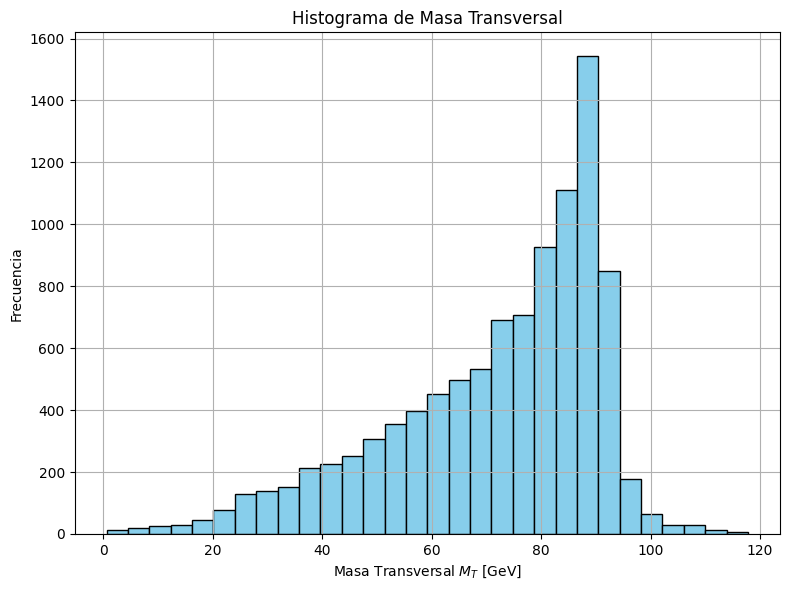

In [ ]:
#Calculo de la masa transversal:
#M_t=((2Pt_1*Pt_2(1-(phi1-phi2))))
df['delta_phi'] = df['phi1'] - df['phi2']
df['M_t']=np.sqrt(2 * df['pt1'] * df['pt2'] * (1 - np.cos(df['delta_phi'])))
Masa_t=df['M_t'].astype(float)

#Histograma de Masa Transversal
plt.figure(figsize=(8, 6))
plt.hist(df['M_t'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Masa Transversal $M_T$ [GeV]')
plt.ylabel('Frecuencia')
plt.title('Histograma de Masa Transversal')
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
M_Zt1=df[Masa_t>=91.1749]
MZt=M_Zt1[M_Zt1<=91.1935]
len(MZt)

912

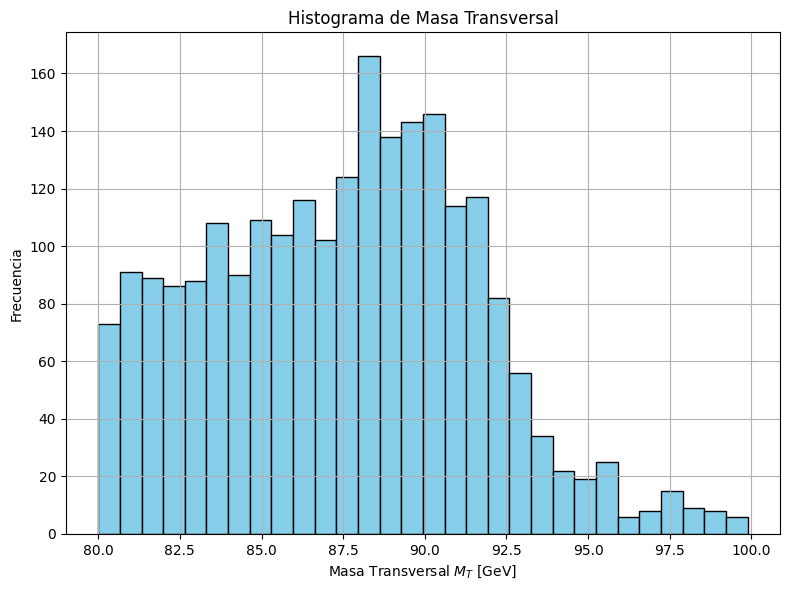

In [ ]:
#Se hace un corte para tener solo eventos con bajo aislamiento

df_MT_cut = df[(df['M_t'] > 80) & (df['M_t'] < 100) & (df['iso1'] < 0.15) & (df['iso2'] < 0.15)]

plt.figure(figsize=(8, 6))
# Cambié df['df_MT_cut'] por df_MT_cut['M_t'], porque df_MT_cut es un DataFrame filtrado, no una columna
plt.hist(df_MT_cut['M_t'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Masa Transversal $M_T$ [GeV]')
plt.ylabel('Frecuencia')
plt.title('Histograma de Masa Transversal')
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
df_MT_cut_z = df_MT_cut[(df_MT_cut['M_t'] > 91.1749) & (df_MT_cut['M_t'] < 91.1935)]
len(df_MT_cut_z)

6

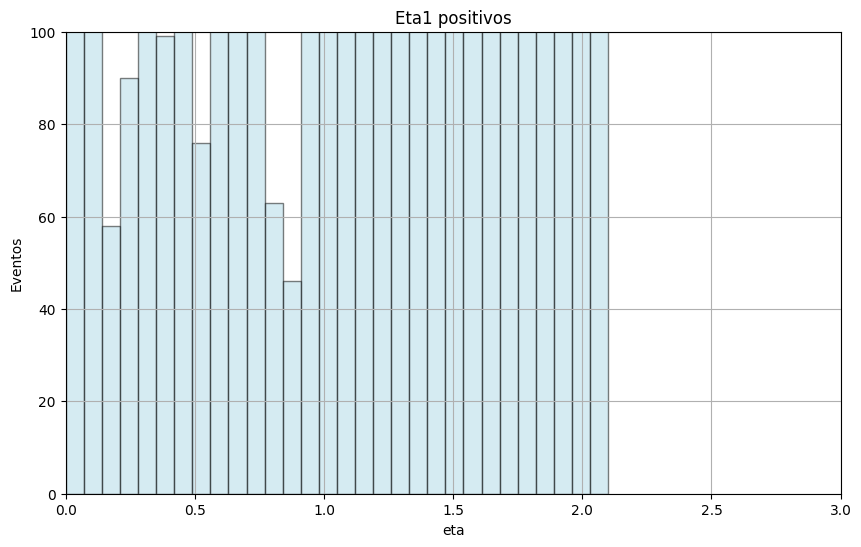

In [ ]:
eta1=df['eta1'].astype(float)
eta1pos=eta1[eta1>0]

eta2=df["eta2"].astype(float)
eta2pos=eta2[eta2>0]

plt.figure(figsize=(10,6))
plt.title("Eta1 positivos")
eta1pos.hist(bins=30,color='lightblue',edgecolor='black',alpha=.5)
#eta2pos.hist(bins=30,color='green',edgecolor='black')
plt.axis([0,3, 0, 100])
plt.xlabel('eta')
plt.ylabel('Eventos')
plt.show()

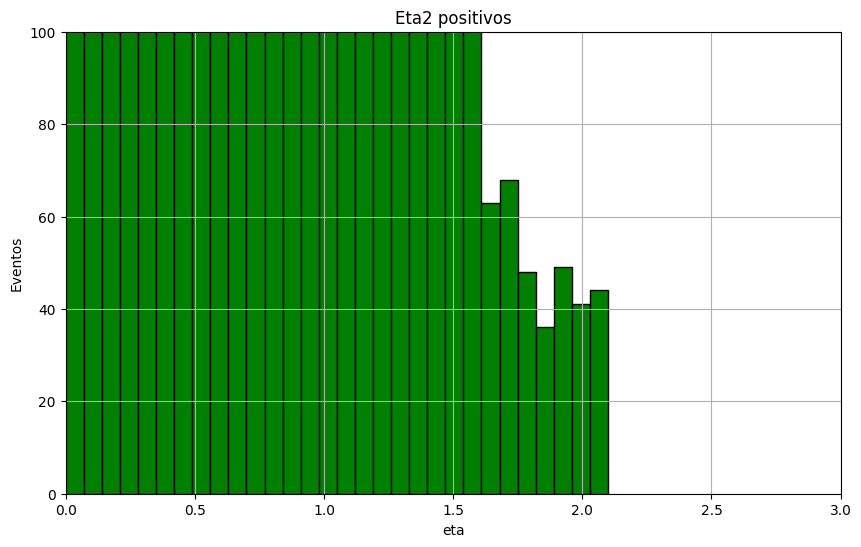

In [ ]:
plt.figure(figsize=(10,6))
plt.title("Eta2 positivos")
#eta1pos.hist(bins=30,color='lightblue',edgecolor='black',alpha=.5)
eta2pos.hist(bins=30,color='green',edgecolor='black')
plt.axis([0,3, 0, 100])
plt.xlabel('eta')
plt.ylabel('Eventos')
plt.show()

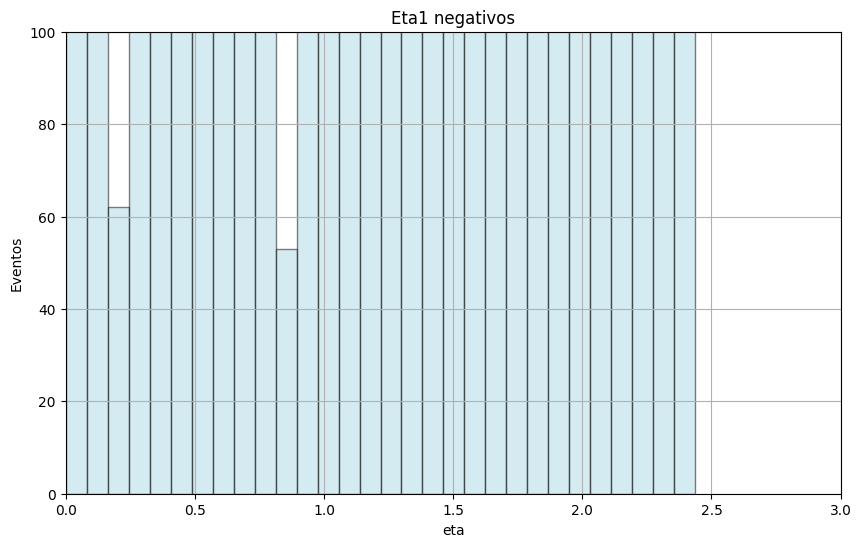

In [ ]:
eta1neg=eta1[eta1<0]
eta1negabs=abs(eta1neg)

eta2neg=eta2[eta2<0]
eta2negabs=abs(eta2neg)
plt.figure(figsize=(10,6))
plt.title("Eta1 negativos")
eta1negabs.hist(bins=30,color='lightblue',edgecolor='black',alpha=.5)
#eta2negabs.hist(bins=30,color='lightgreen',edgecolor='black') #Para histogramas
plt.axis([0,3, 0, 100])
plt.xlabel('eta')
plt.ylabel('Eventos')
plt.show()


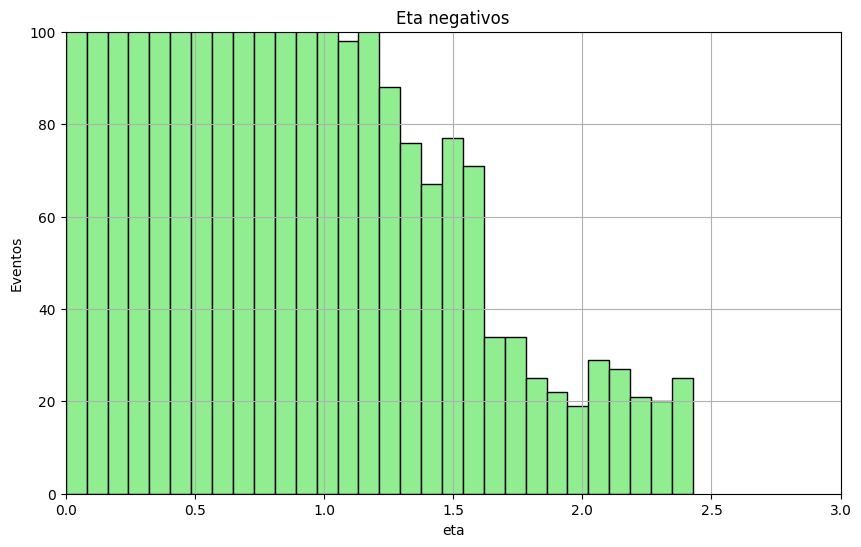

In [ ]:
ta1neg=eta1[eta1<0]
eta1negabs=abs(eta1neg)

eta2neg=eta2[eta2<0]
eta2negabs=abs(eta2neg)
plt.figure(figsize=(10,6))
plt.title("Eta negativos")
#eta1negabs.hist(bins=1000,color='lightblue',edgecolor='black',alpha=.5)
eta2negabs.hist(bins=30,color='lightgreen',edgecolor='black') #Para histogramas
plt.axis([0,3, 0, 100])
plt.xlabel('eta')
plt.ylabel('Eventos')
plt.show()


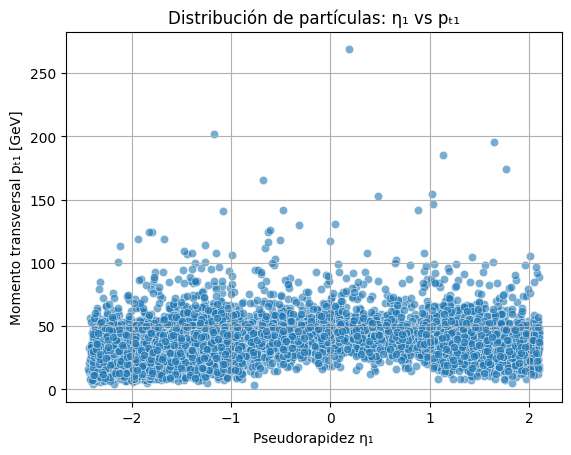

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(data=df, x='eta1', y='pt1', alpha=0.6)
plt.xlabel('Pseudorapidez η₁')
plt.ylabel('Momento transversal pₜ₁ [GeV]')
plt.title('Distribución de partículas: η₁ vs pₜ₁')
plt.grid(True)
plt.show()

In [ ]:
correlacion = df['eta1'].corr(df['pt1'])
print(f'Coeficiente de correlación: {correlacion:.3f}')
#Vemos que no existe una correlacion fuerte entre eta y pt

Coeficiente de correlación: 0.154


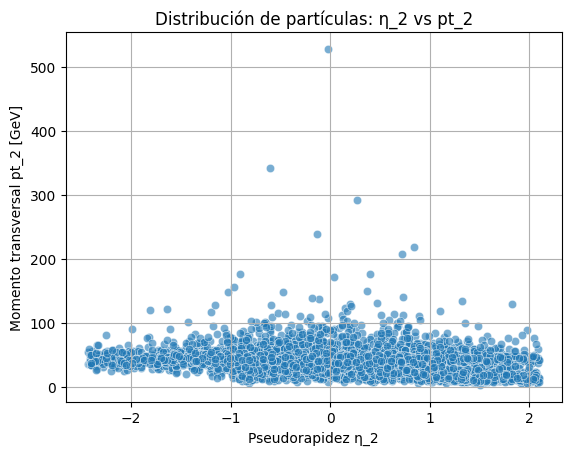

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(data=df, x='eta2', y='pt2', alpha=0.6)
plt.xlabel('Pseudorapidez η_2')
plt.ylabel('Momento transversal pt_2 [GeV]')
plt.title('Distribución de partículas: η_2 vs pt_2')
plt.grid(True)
plt.show()

In [ ]:
correlacion = df['eta2'].corr(df['pt2'])
print(f'Coeficiente de correlación: {correlacion:.3f}')
#Vemos que no existe una correlacion fuerte entre eta y pt

Coeficiente de correlación: -0.198
